In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [ ]:
#Leitura dos dados

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt', header = None, delimiter = "\t")

In [ ]:
df.columns=['A1','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'Saida']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Saida', axis = 1), df['Saida'], test_size=0.30)

In [ ]:
result0 = DecisionTreeClassifier()
result1 = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_leaf=2)
result2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_leaf=2)
result3 = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_leaf=3)
#Treinando o modelo
result0.fit(x_train, y_train)
result1.fit(x_train, y_train)
result2.fit(x_train, y_train)
result3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predict = result0.predict(x_test)
score = list()
score.append(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print('\n')

              precision    recall  f1-score   support

           1       1.00      0.97      0.99       152
           2       0.97      0.95      0.96       152
           3       0.94      0.97      0.95       146
           4       0.98      1.00      0.99       150

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600





In [ ]:
predict = result1.predict(x_test)
score = list()
score.append(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print('\n')

              precision    recall  f1-score   support

           1       1.00      0.97      0.99       152
           2       0.96      0.95      0.95       152
           3       0.92      0.96      0.94       146
           4       1.00      1.00      1.00       150

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600





In [ ]:
predict = result2.predict(x_test)
score = list()
score.append(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print('\n')

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       152
           2       0.99      0.94      0.96       152
           3       0.93      0.98      0.95       146
           4       1.00      1.00      1.00       150

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600





In [ ]:
predict = result3.predict(x_test)
score = list()
score.append(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print('\n')

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       152
           2       0.99      0.93      0.96       152
           3       0.92      0.98      0.95       146
           4       1.00      1.00      1.00       150

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600





In [ ]:
result5 = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_leaf=8)
result5.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predict = result5.predict(x_test)
score = list()
score.append(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print('\n')

              precision    recall  f1-score   support

           1       1.00      0.97      0.99       152
           2       0.94      0.99      0.96       152
           3       0.96      0.93      0.94       146
           4       1.00      1.00      1.00       150

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600





In [ ]:
features = list(df.columns[1:])
features

['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'Saida']

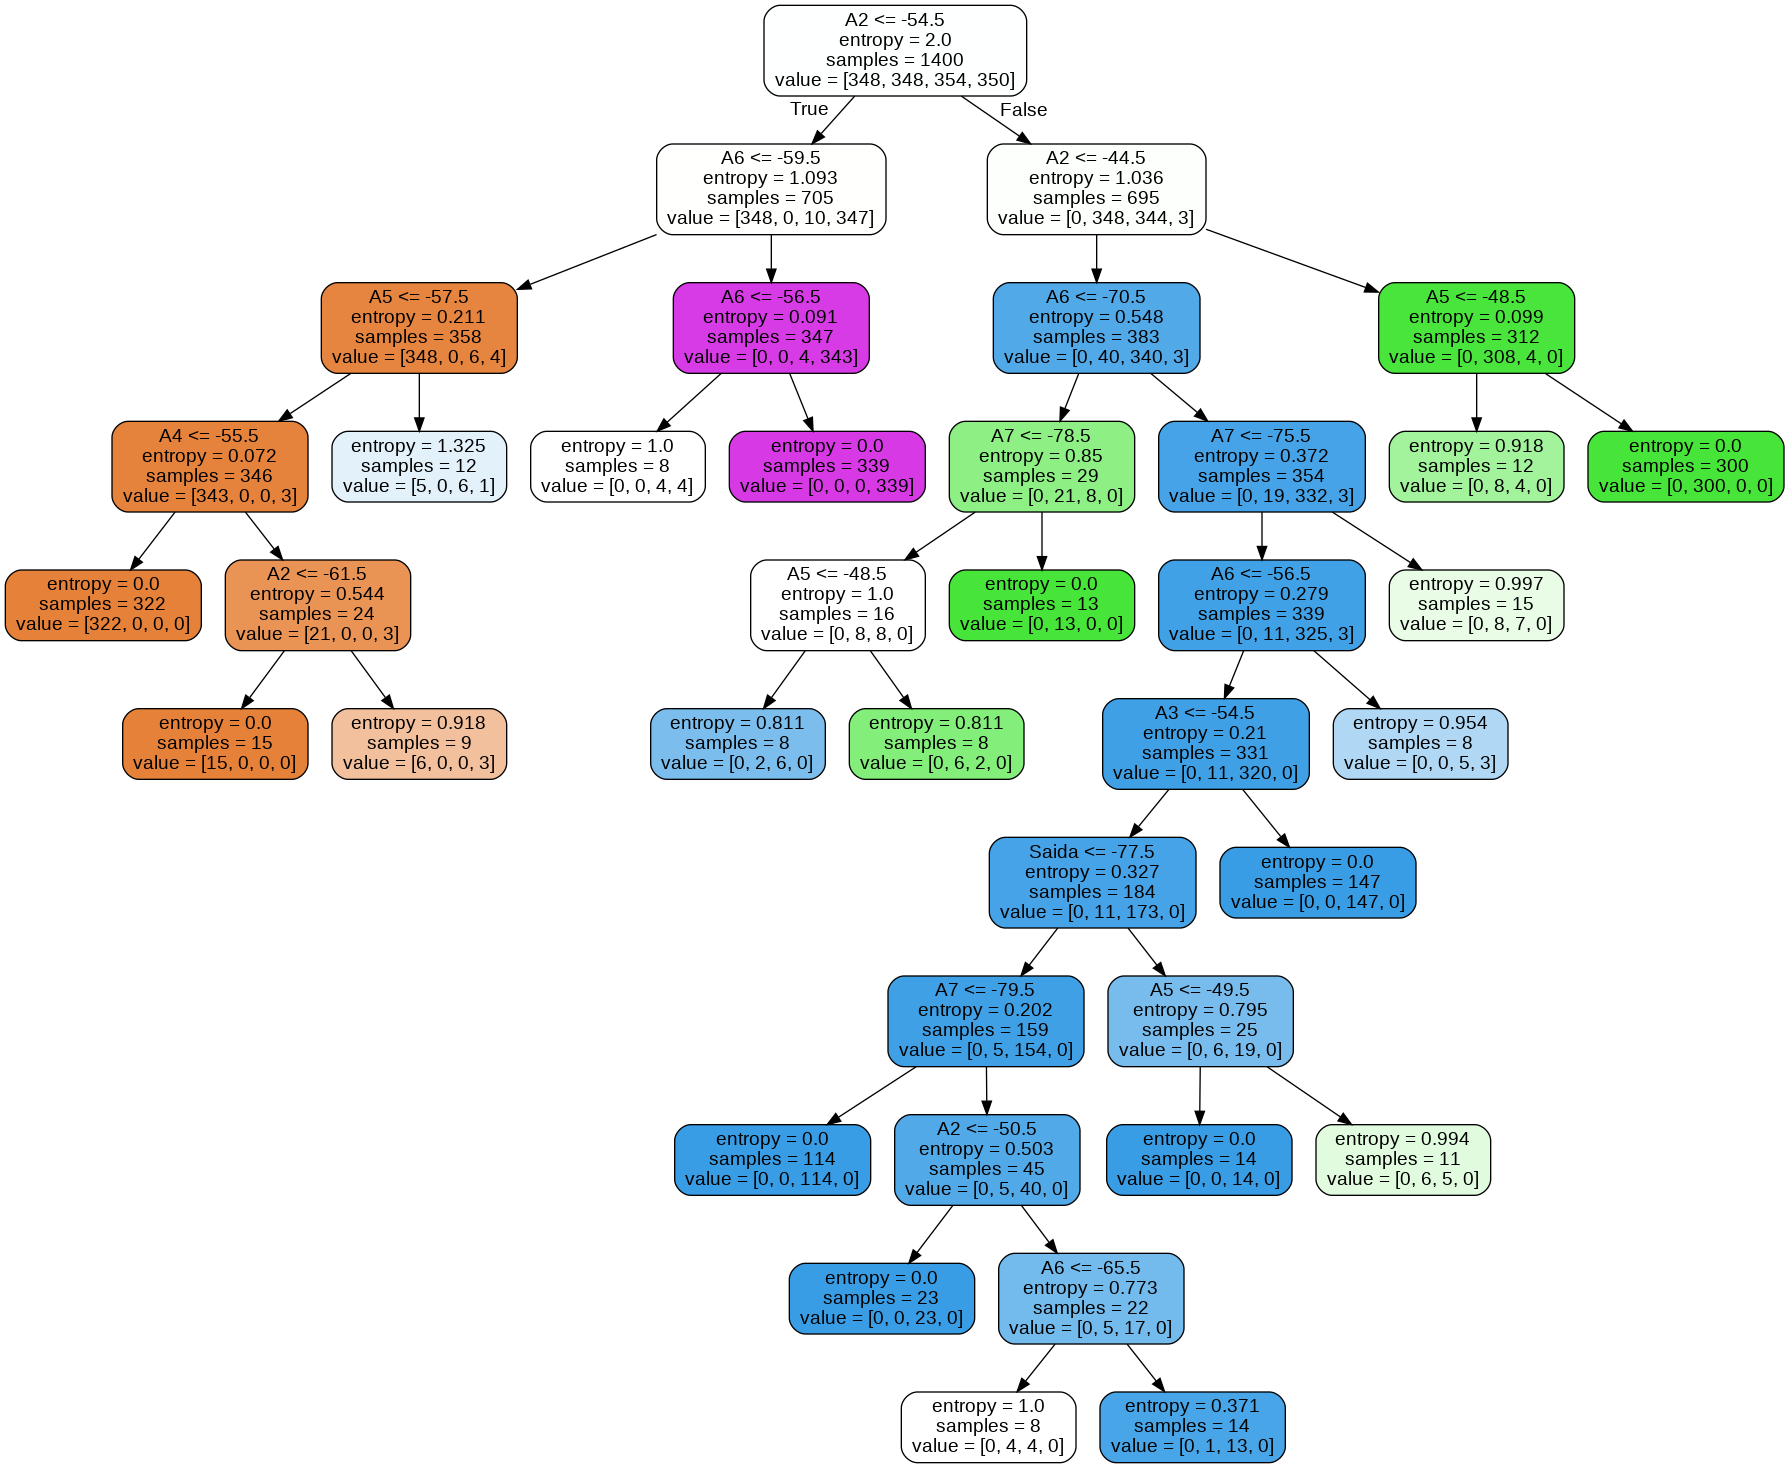

In [ ]:
dot_data = StringIO()  
export_graphviz(result5, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  